三种边缘增强

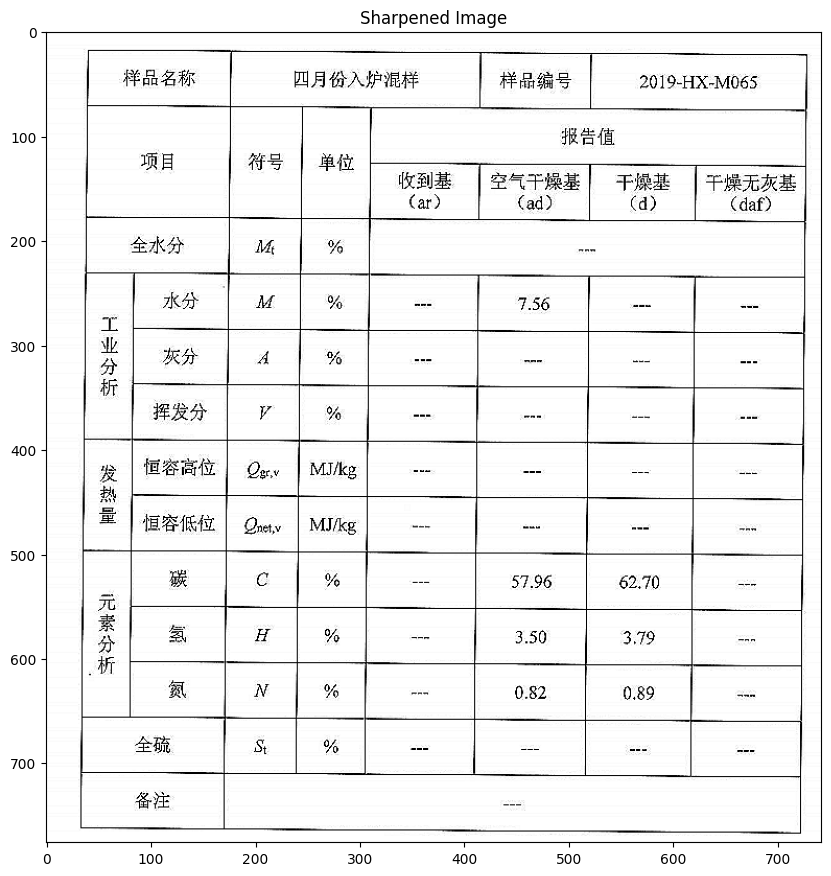

In [14]:
import cv2
import matplotlib.pyplot as plt

# 加载图像
img = cv2.imread('/hy-tmp/table-detect/img/image1.png')

# 边缘增强锐化
kernel = np.array([[0, -2, 0], [-2, 9, -2], [0, -2, 0]])
sharp = cv2.filter2D(img, -1, kernel)

# 显示图像
fig, axs = plt.subplots(figsize=(10, 40))
axs.imshow(sharp)
axs.set_title('Sharpened Image')
plt.show()
plt.show()


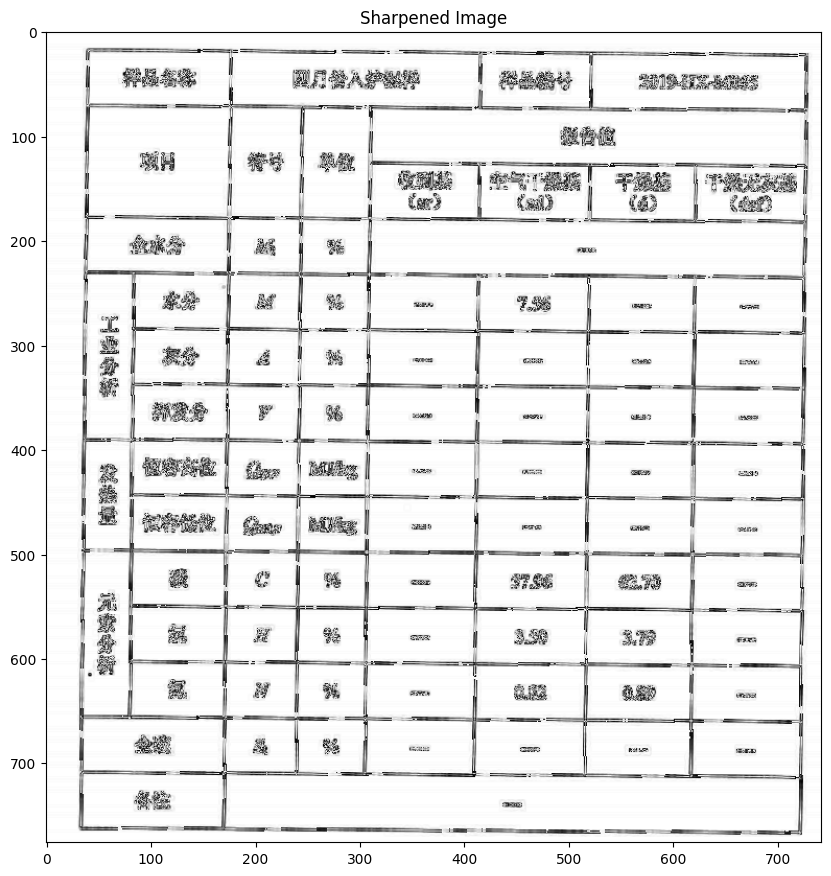

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读入彩色图像
img = cv2.imread('/hy-tmp/table-detect/img/image1.png')

# 分离RGB通道
b, g, r = cv2.split(img)

# 对每个通道进行Sobel算子增强
sobelx_b = cv2.Sobel(b, cv2.CV_64F, 1, 0, ksize=3)
sobely_b = cv2.Sobel(b, cv2.CV_64F, 0, 1, ksize=3)
sobel_b = np.uint8(np.sqrt(sobelx_b**2 + sobely_b**2))

sobelx_g = cv2.Sobel(g, cv2.CV_64F, 1, 0, ksize=3)
sobely_g = cv2.Sobel(g, cv2.CV_64F, 0, 1, ksize=3)
sobel_g = np.uint8(np.sqrt(sobelx_g**2 + sobely_g**2))

sobelx_r = cv2.Sobel(r, cv2.CV_64F, 1, 0, ksize=3)
sobely_r = cv2.Sobel(r, cv2.CV_64F, 0, 1, ksize=3)
sobel_r = np.uint8(np.sqrt(sobelx_r**2 + sobely_r**2))

# 合并通道
sobel = cv2.merge((sobel_b, sobel_g, sobel_r))

# 对图像进行反转
sobel = cv2.bitwise_not(sobel)

# 显示图像
fig, axs = plt.subplots(figsize=(10, 40))
axs.imshow(sobel)
axs.set_title('Sharpened Image')
plt.show()



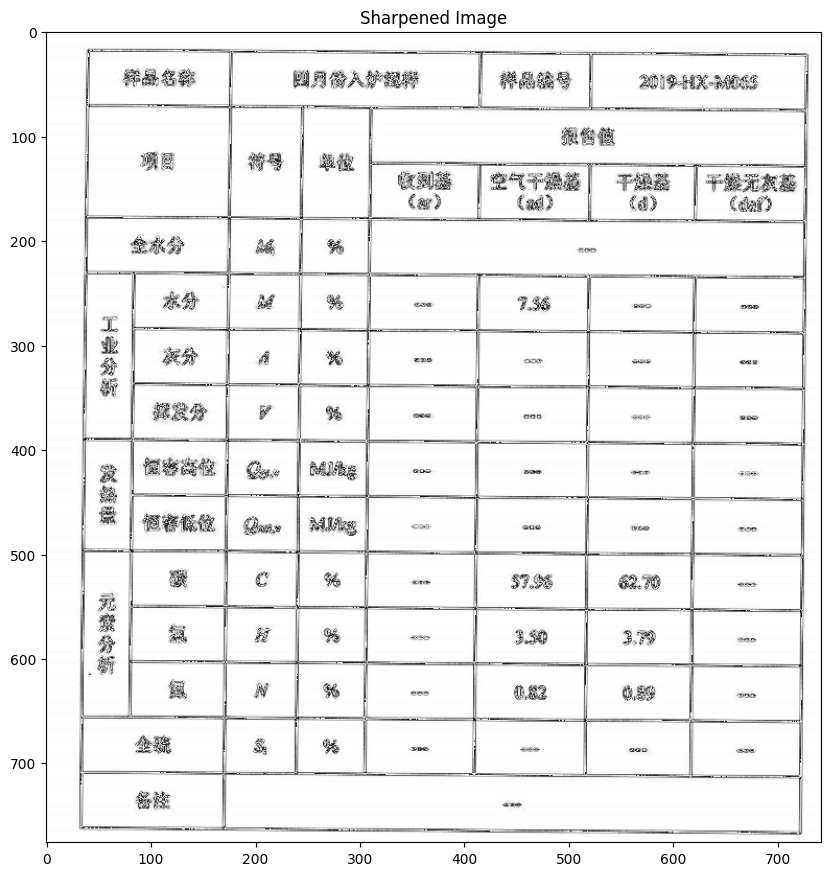

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读入图像
img = cv2.imread('/hy-tmp/table-detect/img/image1.png')

# 分离RGB通道
b, g, r = cv2.split(img)

# 对每个通道进行Laplacian算子增强
laplacian_b = cv2.Laplacian(b, cv2.CV_64F)
laplacian_b = np.uint8(np.absolute(laplacian_b))

laplacian_g = cv2.Laplacian(g, cv2.CV_64F)
laplacian_g = np.uint8(np.absolute(laplacian_g))

laplacian_r = cv2.Laplacian(r, cv2.CV_64F)
laplacian_r = np.uint8(np.absolute(laplacian_r))

# 合并三个通道的边缘增强结果成一个RGB彩色图像
laplacian = cv2.merge((laplacian_b, laplacian_g, laplacian_r))

# 对图像进行反转
laplacian = cv2.bitwise_not(laplacian)

# 显示图像
fig, axs = plt.subplots(figsize=(10, 40))
axs.imshow(laplacian)
axs.set_title('Sharpened Image')
plt.show()


灰度增强

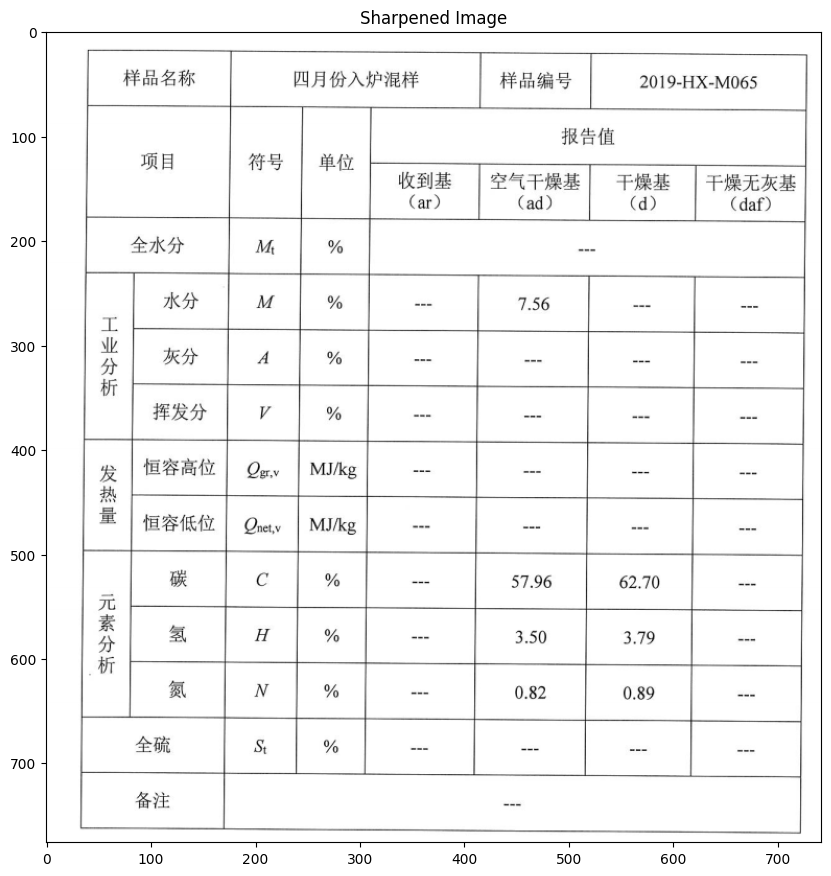

In [17]:
import cv2
import matplotlib.pyplot as plt

# 读入图像
image = cv2.imread('/hy-tmp/table-detect/img/image1.png')

# 将图像转换为灰度图像
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 获取图像的直方图
histogram = cv2.calcHist([gray_image],[0],None,[256],[0,256])

# 获取直方图中像素值最小和最大的像素
minimum_pixel_value, maximum_pixel_value, _, _ = cv2.minMaxLoc(gray_image)

# 调整灰度级别
for i in range(len(histogram)):
    histogram_value = histogram[i]
    if i < minimum_pixel_value or i > maximum_pixel_value:
        histogram[i] = 0
    else:
        histogram[i] = int(255 * (i - minimum_pixel_value) / (maximum_pixel_value - minimum_pixel_value))

# 应用灰度增强
enhanced_image = cv2.LUT(gray_image, histogram)

# 显示图像
fig, axs = plt.subplots(figsize=(10, 40))
axs.imshow(enhanced_image, cmap='gray')
axs.set_title('Sharpened Image')
plt.show()


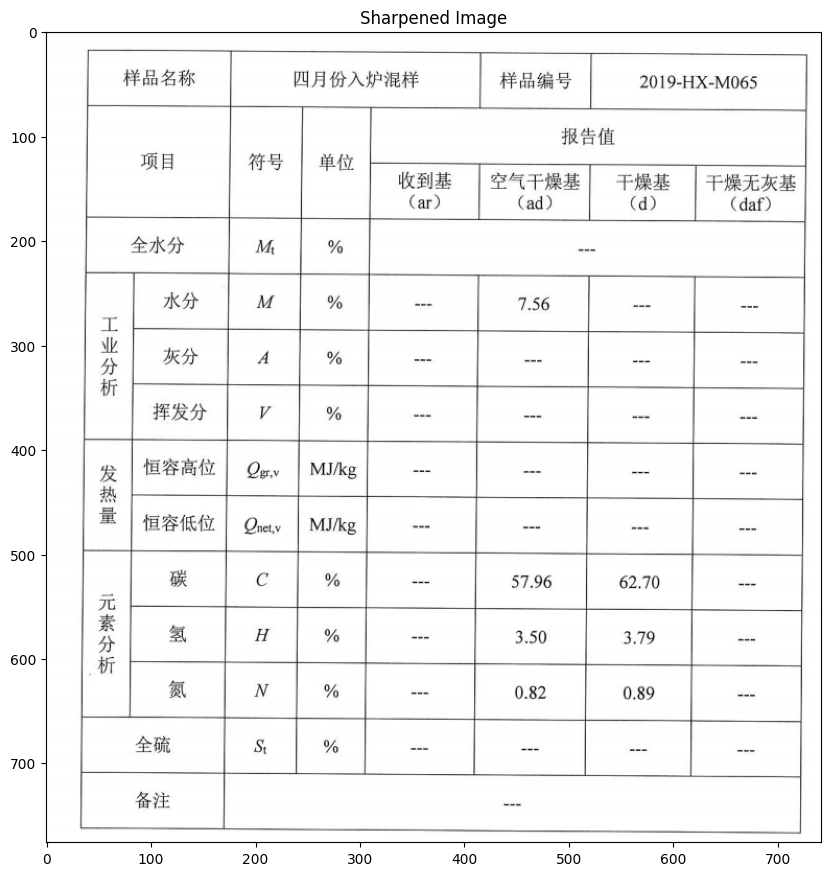

In [13]:
import cv2
import matplotlib.pyplot as plt

# 读入图像
image = cv2.imread('/hy-tmp/table-detect/img/image1.png')

# 显示图像
fig, axs = plt.subplots(figsize=(10, 40))
axs.imshow(image, cmap='gray')
axs.set_title('Sharpened Image')
plt.show()
